<a href="https://colab.research.google.com/github/DataMounster/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Elif_Ayar_of_LS_DS_111_Exploratory_Data_Analysis_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Loading and Exploring Datasets

This assignment is purposely open-ended. You will be asked to load datasets from the [UC-Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). 

Even though you maybe using different datasets than your fellow classmates, try and be supportive and assist each other in the challenges that you are facing. You will only deepend your understanding of these topics as you work to assist one another. Many popular UCI datasets face similar data loading challenges.

Remember that the UCI datasets do not necessarily have a file type of `.csv` so it's important that you learn as much as you can about the dataset before you try and load it. See if you can look at the raw text of the file either locally or using the `!curl` shell command -or in some other way before you try and read it in as a dataframe. This will help you catch what would otherwise be unforseen problems.

Feel free to embellish this notebook with additional markdown cells,code cells, comments, graphs, etc. Whatever you think helps adequately address the questions.

## 1) Load a dataset from UCI (via its URL)

Please navigate to the home page and choose a dataset (other than the Adult dataset) from the "Most Popular" section on the right-hand side of the home page. Load the dataset via its URL and check the following (show your work):

- Are the headers showing up properly?
- Look at the first 5 and the last 5 rows, do they seem to be in order?
- Does the dataset have the correct number of rows and columns as described in the UCI page? 
 - Remember, that UCI does not count the y variable (column of values that we might want to predict via a machine learning model) as an "attribute" but rather as a "class attribute" so you may end up seeing a number of columns that is one greater than the number listed on the UCI website.
- Does UCI list this dataset as having missing values? Check for missing values and see if your analysis corroborates what UCI reports?
- if `NaN` values or other missing value indicators are not being detected by `df.isnull().sum()` find a way to replace whatever is indicating the missing values with `np.NaN`.
- Use the .describe() function in order to see the summary statistics of both the numeric and non-numeric columns. 

In [55]:
# import 

import numpy as np
import pandas as pd

# Copy the data "Wine" and assing its URL as a  new variable

URL='https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'

column_headers=['Rate','Alcohol','Malic_Acid  ','  Ash','Alcalinity_of_ash','Magnesium',
                'Total_Phenols','Flavanoids','NonFlavanoid_Phenols',
                'Proanthocyanins','Color_Intensity  ','  Hue',
                'OD280/OD315_of_Dilute_Wines', 'Proline']
wine=pd.read_csv(URL,header=None, names=column_headers)

# First 5 rows
wine.head()



,Rate,Alcohol,Malic_Acid,Ash,Alcalinity_of_ash,Magnesium,Total_Phenols,Flavanoids,NonFlavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280/OD315_of_Dilute_Wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [42]:
#Last 5 rows 
wine.tail()

,Rate,Alcohol,Malic_Acid,Ash,Alcalinity_of_ash,Magnesium,Total_Phenols,Flavanoids,NonFlavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280/OD315_of_Dilute_Wines,Proline
168,3,13.58,2.58,2.69,24.5,105,1.55,0.84,0.39,1.54,8.660000,0.74,1.80,750
169,3,13.40,4.60,2.86,25.0,112,1.98,0.96,0.27,1.11,8.500000,0.67,1.92,630
170,3,12.20,3.03,2.32,19.0,96,1.25,0.49,0.40,0.73,5.500000,0.66,1.83,510
171,3,12.77,2.39,2.28,19.5,86,1.39,0.51,0.48,0.64,9.899999,0.57,1.63,470
172,3,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.700000,0.62,1.71,660
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.700000,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.300000,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.200000,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.300000,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.200000,0.61,1.60,560


In [39]:
#Let's use .shape and .describe() functions

wine.shape


(178, 14)

In [40]:
wine.describe()

,Rate,Alcohol,Malic_Acid,Ash,Alcalinity_of_ash,Magnesium,Total_Phenols,Flavanoids,NonFlavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280/OD315_of_Dilute_Wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [41]:
#Cheking for missing values with the .isnull() function.
wine.isnull().sum()



Rate                           0
Alcohol                        0
Malic_Acid                     0
  Ash                          0
Alcalinity_of_ash              0
Magnesium                      0
Total_Phenols                  0
Flavanoids                     0
NonFlavanoid_Phenols           0
Proanthocyanins                0
Color_Intensity                0
  Hue                          0
OD280/OD315_of_Dilute_Wines    0
Proline                        0
dtype: int64

In [45]:
# I want to check missing values by using .sample() function
wine.sample(10)

,Rate,Alcohol,Malic_Acid,Ash,Alcalinity_of_ash,Magnesium,Total_Phenols,Flavanoids,NonFlavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280/OD315_of_Dilute_Wines,Proline
13,1,14.75,1.73,2.39,11.4,91,3.10,3.69,0.43,2.81,5.40,1.25,2.73,1150
12,1,13.75,1.73,2.41,16.0,89,2.60,2.76,0.29,1.81,5.60,1.15,2.90,1320
20,1,14.06,1.63,2.28,16.0,126,3.00,3.17,0.24,2.10,5.65,1.09,3.71,780
60,2,12.33,1.10,2.28,16.0,101,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680
50,1,13.05,1.73,2.04,12.4,92,2.72,3.27,0.17,2.91,7.20,1.12,2.91,1150
108,2,12.22,1.29,1.94,19.0,92,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312
16,1,14.30,1.92,2.72,20.0,120,2.80,3.14,0.33,1.97,6.20,1.07,2.65,1280
115,2,11.03,1.51,2.20,21.5,85,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407
21,1,12.93,3.80,2.65,18.6,102,2.41,2.41,0.25,1.98,4.50,1.03,3.52,770
118,2,12.77,3.43,1.98,16.0,80,1.63,1.25,0.43,0.83,3.40,0.70,2.12,372


After cheking head, tail, wine.isnull, and wine.sample(10) functions, wine data seems very clear and no missing information. [link text](https://)

## 2) Load a dataset from your local machine.
Choose a second dataset from the "Popular Datasets" listing on UCI, but this time download it to your local machine instead of reading it in via the URL. Upload the file to Google Colab using the files tab in the left-hand sidebar or by importing `files` from `google.colab` The following link will be a useful resource if you can't remember the syntax: <https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92>

- Answer all of the same bullet point questions from part 1 again on this new dataset. 


In [0]:
#import
import numpy as np
import pandas as pd

# Load a dataset, 'Wine Quality' from my local machine
# let's add the first row as column names

column_headers=['Buying','Maint','Doors','Persons','lug_boot','Safety',
                'Class_Value']

car_data=pd.read_csv('sample_data/car.data',header=None,names=column_headers)


In [73]:
# Let's look first 5 rows
car_data.head()


,Buying,Maint,Doors,Persons,lug_boot,Safety,Class_Value
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [74]:
#let's look last 5 rows
car_data.tail()

,Buying,Maint,Doors,Persons,lug_boot,Safety,Class_Value
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


In [77]:
# Wondering .shape and .describe too
car_data.shape

(1728, 7)

In [79]:
car_data.describe()

,Buying,Maint,Doors,Persons,lug_boot,Safety,Class_Value
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,high,high,4,4,small,high,unacc
freq,432,432,432,576,576,576,1210


In [80]:
#I will check the missing values by using .sample() and .isnull() functions

car_data.sample(20)

,Buying,Maint,Doors,Persons,lug_boot,Safety,Class_Value
1104,med,med,2,more,big,low,unacc
883,med,vhigh,2,more,small,med,unacc
530,high,vhigh,5more,4,big,high,unacc
1651,low,low,3,2,med,med,unacc
1121,med,med,3,4,med,high,acc
449,high,vhigh,2,4,big,high,unacc
1202,med,low,2,4,med,high,good
1425,low,high,2,more,med,low,unacc
1138,med,med,4,2,med,med,unacc
425,vhigh,low,5more,more,small,high,acc


In [81]:
car_data.isnull().sum()

Buying         0
Maint          0
Doors          0
Persons        0
lug_boot       0
Safety         0
Class_Value    0
dtype: int64

The car data looks very clear and there is not missing data information. 


## 3) Make Crosstabs of the Categorical Variables

Take whichever of the above datasets has more categorical variables and use crosstabs to tabulate the different instances of the categorical variables.


In [82]:
# I want to work on the car dataset 'car_data'
# Let's look first the relationship between 'Persons ' and 'Buying'
pd.crosstab(car_data['Persons'],car_data['Buying'])


Buying,high,low,med,vhigh
Persons,,,,
2,144,144,144,144
4,144,144,144,144
more,144,144,144,144


In [83]:
# I am also interested in seeing 'Persons' and 'Doors'
pd.crosstab(car_data['Persons'],car_data['Doors'])

Doors,2,3,4,5more
Persons,,,,
2,144,144,144,144
4,144,144,144,144
more,144,144,144,144


In [85]:
# Crosstab between 'Buying' and 'Maint'
pd.crosstab(car_data['Buying'],car_data['Maint'])

Maint,high,low,med,vhigh
Buying,,,,
high,108,108,108,108
low,108,108,108,108
med,108,108,108,108
vhigh,108,108,108,108


## 4) Explore the distributions of the variables of the dataset using:
- Histograms
- Scatterplots
- Density Plots

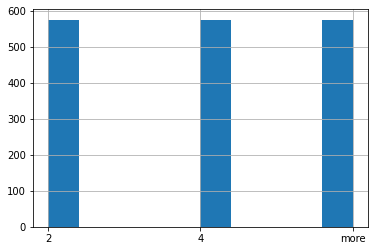

In [88]:
# Histogram
car_data['Persons'].hist();

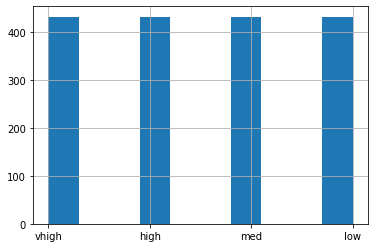

In [89]:
# Histogram
car_data['Buying'].hist();

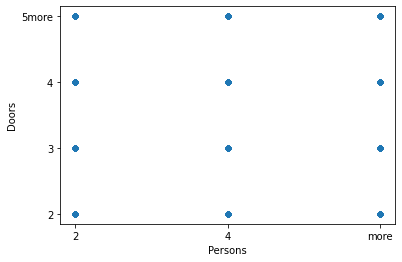

In [92]:
#Scatter

car_data.plot.scatter('Persons',"Doors");

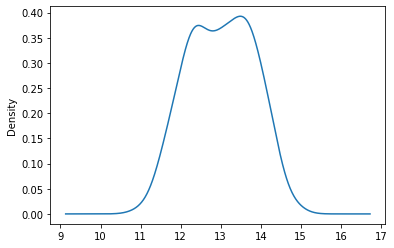

In [97]:
#Density , I will use 'wine' data because I need numeric dataset.

wine['Alcohol'].plot.density();

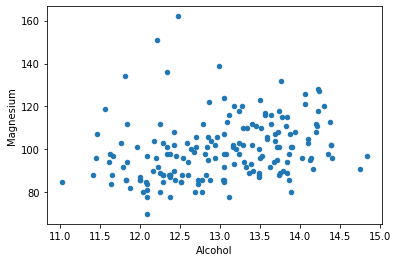

In [99]:
# I want to look at scatter graph of wine data as well
wine.plot.scatter('Alcohol', 'Magnesium');

## 5) Create at least one visualization from a crosstab:

Remember that a crosstab is just a dataframe and can be manipulated in the same way by row index, column, index, or column/row/cell position.


In [0]:
# name a new crosstab between "Buying" and " Persons", and then create visualization from crosstab

Relationship1=pd.crosstab(car_data['Persons'],car_data['Buying'])

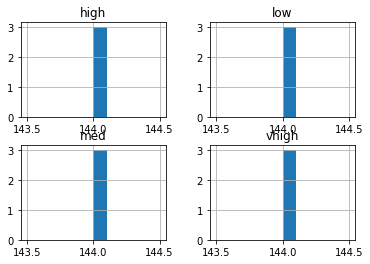

In [102]:
# Histogram
Relationship1.hist();

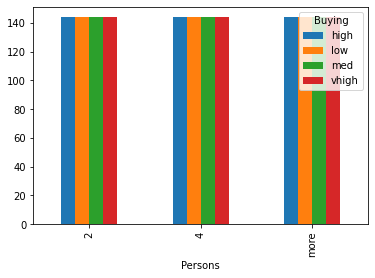

In [103]:
#Bar
Relationship1.plot(kind='bar');

## Stretch Goals 

The following additional study tasks are optional, they are intended to give you an opportunity to stretch yourself beyond the main requirements of the assignment. You can pick and choose from the below, you do not need to complete them in any particular order.

### - Practice Exploring other Datasets

### -  Try using the Seaborn plotting library's "Pairplot" functionality in order to explore all of the possible histograms and scatterplots of your dataset all at once:

[Seaborn Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

### - Turn some of the continuous variables into categorical variables by binning the values using:
- [pd.cut()](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html)
- [pd.qcut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)
- <https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut>

And then use crosstabs to compare/visualize these binned variables against the other variables.


### - Other types and sources of data
Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.